### Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
df_p = pd.read_csv('./Data/Pedestrian_Counting_System_-_Monthly__counts_per_hour_.csv')
df_p

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2887628,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,"November 01, 2019 05:00:00 PM",2019,November,1,Friday,17,36,Queen St (West),774
...,...,...,...,...,...,...,...,...,...,...
4176213,4181685,"February 24, 2022 08:00:00 PM",2022,February,24,Thursday,20,86,Queensberry St - Errol St (South),69
4176214,4181686,"February 24, 2022 09:00:00 PM",2022,February,24,Thursday,21,86,Queensberry St - Errol St (South),46
4176215,4181687,"February 24, 2022 10:00:00 PM",2022,February,24,Thursday,22,86,Queensberry St - Errol St (South),52
4176216,4181688,"February 24, 2022 11:00:00 PM",2022,February,24,Thursday,23,86,Queensberry St - Errol St (South),9


In [5]:
print('Number of sensors: ', len(df_p['Sensor_ID'].unique()))

Number of sensors:  81


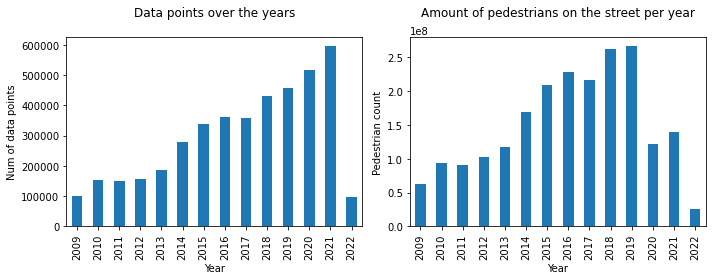

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
df_p.groupby('Year').count()['ID'].plot.bar(title='Data points over the years\n', ax = ax[0])
df_p.groupby(['Year']).sum()['Hourly_Counts'].plot.bar(title='Amount of pedestrians on the street per year\n', ax=ax[1])

ax[0].set_ylabel('Num of data points');
ax[1].set_ylabel('Pedestrian count');

plt.tight_layout() 
plt.show()

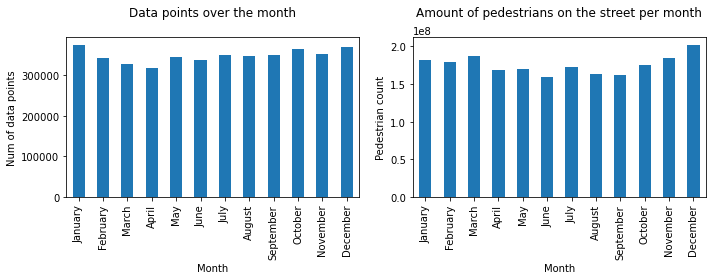

In [8]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_p['Month'] = pd.Categorical(df_p['Month'], categories=months, ordered=True)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
df_p.groupby('Month').count()['ID'].plot.bar(title='Data points over the month\n', ax = ax[0])
df_p.groupby(['Month']).sum()['Hourly_Counts'].plot.bar(title='Amount of pedestrians on the street per month\n', ax=ax[1])
#ax[1].set_title('Caucasian Confusion Matrix\n');
#ax[1].set_xlabel('\nPredicted Values')
ax[0].set_ylabel('Num of data points');
ax[1].set_ylabel('Pedestrian count');

plt.tight_layout() 
plt.show()

<AxesSubplot:title={'center':'Amount of pedestrians on the street'}, xlabel='Sensor_ID'>

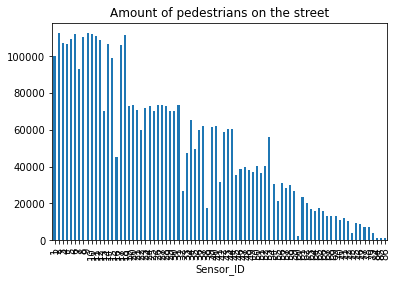

In [9]:
df_p.groupby(['Sensor_ID']).count()['ID'].plot.bar(title='Amount of pedestrians on the street')

In [10]:
df_s = pd.read_csv('./Data/Pedestrian_Counting_System_-_Sensor_Locations.csv')
df_s

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
0,55,Elizabeth St-La Trobe St (East),Eli380_T,2018/07/19,A,NaN,North,South,-37.809889,144.961343,"(-37.80988941, 144.96134331)"
1,45,Little Collins St-Swanston St (East),Swa148_T,2017/06/29,A,NaN,North,South,-37.814141,144.966094,"(-37.81414074, 144.9660938)"
2,61,RMIT Building 14,RMIT14_T,2019/06/28,A,NaN,North,South,-37.807675,144.963091,"(-37.80767455, 144.96309115)"
3,7,Birrarung Marr,Fed_T,2014/12/17,A,NaN,East,West,-37.818629,144.971694,"(-37.81862929, 144.97169395)"
4,72,Flinders St- ACMI,ACMI_T,2020/11/30,A,NaN,East,West,-37.817263,144.968728,"(-37.81726337, 144.96872809)"
...,...,...,...,...,...,...,...,...,...,...,...
73,78,Harbour Esplanade (West) - Bike Path,HarEsB_T,2021/03/30,A,NaN,North,South,-37.814716,144.944651,"(-37.81471642, 144.9446508)"
74,77,Harbour Esplanade (West) - Pedestrian path,HarEsP_T,2021/03/25,A,NaN,North,South,-37.814414,144.944330,"(-37.81441438, 144.94433026)"
75,35,Southbank,SouthB_T,2021/04/15,A,River side,East,West,-37.820178,144.965089,"(-37.82017828, 144.96508877)"
76,6,Flinders Street Station Underpass,FliS_T,2009/03/25,A,Upgraded on 8/09/21,North,South,-37.819117,144.965583,"(-37.81911704, 144.96558256)"


In [12]:
map_hooray = folium.Map(location=[-37.8140000, 144.9633200],tiles = "Stamen Toner",
                    zoom_start = 13) 

# Ensure you're handing it floats
df_s['latitude'] = df_s['latitude'].astype(float)
df_s['longitude'] = df_s['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_s[['latitude', 'longitude']]

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data, blur=5, radius=10).add_to(map_hooray)

# Display the map
map_hooray

In [13]:
df_w = pd.read_csv('./Data/weathermelb2019-Jan-ToNow.csv')
df_w

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2019-01-01,19.7,15.4,24.7,0.0,NaN,189.0,14.0,NaN,1012.3,NaN
1,2019-01-02,19.2,16.1,22.7,0.0,NaN,171.0,17.5,NaN,1013.1,NaN
2,2019-01-03,21.2,15.0,28.6,0.0,NaN,174.0,12.8,NaN,1011.1,NaN
3,2019-01-04,26.5,19.1,37.4,0.0,NaN,323.0,22.8,NaN,1006.4,NaN
4,2019-01-05,17.1,14.5,18.6,0.3,NaN,185.0,19.4,NaN,1013.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1185,2022-03-31,15.2,12.6,18.3,0.0,NaN,153.0,19.1,NaN,1023.4,NaN
1186,2022-04-01,14.7,11.7,18.3,0.0,NaN,141.0,19.8,NaN,1026.8,NaN
1187,2022-04-02,15.2,12.4,17.6,0.0,NaN,148.0,16.8,NaN,1022.1,NaN
1188,2022-04-03,15.7,13.9,17.4,1.1,NaN,164.0,11.7,NaN,1015.7,NaN


In [14]:
df_w['year'] = pd.DatetimeIndex(df_w['date']).year
df_w['month'] = pd.DatetimeIndex(df_w['date']).month
df_w

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,year,month
0,2019-01-01,19.7,15.4,24.7,0.0,NaN,189.0,14.0,NaN,1012.3,NaN,2019,1
1,2019-01-02,19.2,16.1,22.7,0.0,NaN,171.0,17.5,NaN,1013.1,NaN,2019,1
2,2019-01-03,21.2,15.0,28.6,0.0,NaN,174.0,12.8,NaN,1011.1,NaN,2019,1
3,2019-01-04,26.5,19.1,37.4,0.0,NaN,323.0,22.8,NaN,1006.4,NaN,2019,1
4,2019-01-05,17.1,14.5,18.6,0.3,NaN,185.0,19.4,NaN,1013.3,NaN,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,2022-03-31,15.2,12.6,18.3,0.0,NaN,153.0,19.1,NaN,1023.4,NaN,2022,3
1186,2022-04-01,14.7,11.7,18.3,0.0,NaN,141.0,19.8,NaN,1026.8,NaN,2022,4
1187,2022-04-02,15.2,12.4,17.6,0.0,NaN,148.0,16.8,NaN,1022.1,NaN,2022,4
1188,2022-04-03,15.7,13.9,17.4,1.1,NaN,164.0,11.7,NaN,1015.7,NaN,2022,4


In [11]:
df_w.pres = np.where(df_w.pres.isnull(), 0, df:w.pres)
df_w.pres.unique()

array([1012.3, 1013.1, 1011.1, 1006.4, 1013.3, 1019. , 1017.6, 1011.6,
       1015.9, 1018.5, 1014.5, 1015.8, 1012.4, 1009.8, 1010.7, 1009.6,
       1010. , 1019.8, 1020.5, 1016.5, 1012.8, 1014.9, 1006. , 1008.8,
       1011.3, 1013.5, 1010.9, 1007. , 1013.6, 1014.6, 1012.7, 1007.6,
       1003.1, 1008.9, 1002.8,  997.1, 1010.2, 1022.7, 1018. , 1012. ,
       1007.3, 1012.2, 1023.2, 1024.2, 1024.6, 1021.2, 1020.6, 1018.3,
       1019.1, 1018.4, 1017.4, 1017.8, 1011.9, 1015. , 1021.9, 1017.9,
       1012.6, 1016.6, 1018.9, 1020. , 1016.8, 1015.6, 1015.1, 1015.7,
       1014.4, 1008.6, 1006.3, 1022.8, 1006.1, 1010.1, 1016.1, 1024.7,
       1024.8, 1025.4, 1028.9, 1012.5, 1026.6, 1026.7, 1023.4, 1024.1,
       1023.3, 1020.2, 1019.7, 1026.3, 1026.4, 1018.1, 1027.3, 1023.7,
       1020.3, 1018.8, 1025.2, 1024.9, 1024.4, 1015.2, 1015.3, 1019.5,
       1021.6, 1011.4, 1027.6, 1026.5, 1028. , 1030.8, 1028.2, 1026.9,
       1029. , 1026.8, 1020.4, 1022.4, 1027.1, 1017.2, 1013. , 1009.4,
      

In [15]:
df_w.groupby(df_w['year']).mean()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,month
year,,,,,,,,,,,
2019,14.504121,9.737637,19.001648,0.826446,NaN,219.807163,14.712672,NaN,1017.865659,NaN,6.526027
2020,14.568219,11.004384,18.498904,1.535842,NaN,210.164384,19.040548,NaN,1017.213973,NaN,6.513661
2021,13.012088,9.027473,18.092308,1.151944,NaN,212.453297,15.382143,NaN,1016.304945,NaN,6.526027
2022,19.217021,14.544681,24.905319,0.784043,NaN,159.670213,12.673404,NaN,1015.529787,NaN,2.085106


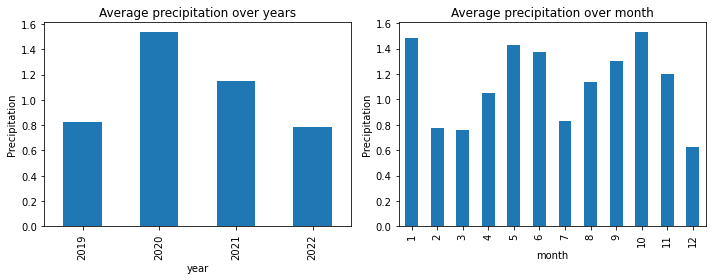

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
df_w.groupby(df_w['year']).mean()['prcp'].plot.bar(title='Average precipitation over years', ax = ax[0])
df_w.groupby(df_w['month']).mean()['prcp'].plot.bar(title='Average precipitation over month', ax = ax[1])
#df6.groupby(['Year']).sum()['Hourly_Counts'].plot.bar(title='Amount of pedestrians on the street per year\n', ax=ax[1])
ax[0].set_ylabel('Precipitation');
ax[1].set_ylabel('Precipitation');

plt.tight_layout() 
plt.show()